# **Supervised Learning -** `LinearRegression` **model**

In [1]:
# data
import pandas as pd
from sklearn.datasets import load_diabetes

data = load_diabetes()
# or
# X, y = load_diabetes(return_X_y=True)
# X  for data
# y for target

# description of each features
# print(data.DESCR)

print("======================================================")
print(data.feature_names)

print("======================================================")
print(data.target)

# load data into a Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# add target to df
df['progression'] = data.target
df.head()


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 26

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### **Data Cleansing**
Read more: [Data Cleansing](http://localhost:8888/notebooks/Pandas/dataframe/data_cleansing.ipynb)

In [2]:
print("Nulls:")
print(df.isnull().sum())

print("======================================================")
print("0s:")
print(df.eq(0).sum())

print("======================================================")
df.info()

Nulls:
age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
progression    0
dtype: int64
0s:
age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
progression    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 

### **Select Features**
-> If we do not want to use all these features to train the model. Instead, we want to choose those features that directly influence the result!  
-> using `corr()`

In [3]:
corr = df.corr().abs()
print(corr['progression'])

# get n largest relative fetures to target
print(corr.nlargest(5, 'progression').index) # for features name
print(corr.nlargest(5, 'progression').values[:, -1]) # for values

age            0.187889
sex            0.043062
bmi            0.586450
bp             0.441482
s1             0.212022
s2             0.174054
s3             0.394789
s4             0.430453
s5             0.565883
s6             0.382483
progression    1.000000
Name: progression, dtype: float64
Index(['progression', 'bmi', 's5', 'bp', 's4'], dtype='object')
[1.         0.58645013 0.56588259 0.44148176 0.43045288]


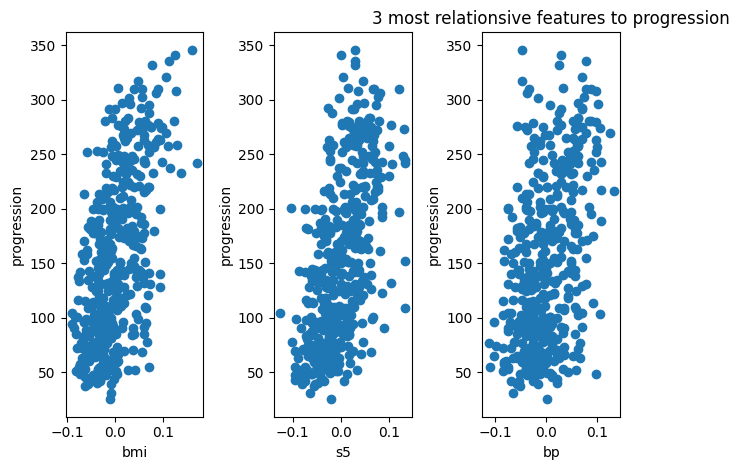

In [4]:
# plot the relationship
import matplotlib.pyplot as plt

features = ['bmi', 's5', 'bp']

fig, ax = plt.subplots(1, 3)
for i in range(len(features)):
    ax[i].scatter(df[features[i]], df['progression'])
    ax[i].set_xlabel(features[i])
    ax[i].set_ylabel('progression')

plt.title('3 most relationsive features to progression')
plt.tight_layout()

# **Training the model - Multiple Regression with** `sklearn.linear_model.LinearRegression`
` Y = Bo + B1.x1 + B2*x2 `  
Where:
- Bo is the values of y when all features equals to 0 -> `model.intecept_`
- B1, b2, ... -> slope (gradient, coef) of each features -> `model.coef_`

### split the data to train and test - with `train_test_split()`

In [5]:
from sklearn.model_selection import train_test_split

X = df[['bmi', 's5', 'bp']]
y = df['progression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0) 
# 75 % for train
# 25 % for test
print(X_test)

          bmi        s5        bp
362  0.104809  0.003709  0.070072
249  0.060618  0.070207  0.052858
271  0.008883 -0.018114  0.042529
435 -0.023451 -0.038460 -0.040099
400  0.045529 -0.034522  0.090729
..        ...       ...       ...
325  0.054152  0.084492 -0.066506
366  0.137143  0.071019 -0.015999
22  -0.004050 -0.061176 -0.009113
68  -0.029918 -0.012909 -0.040099
437  0.019662  0.031193  0.059744

[111 rows x 3 columns]


### training

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# train
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### predict

R-square : 0.32197161696044163


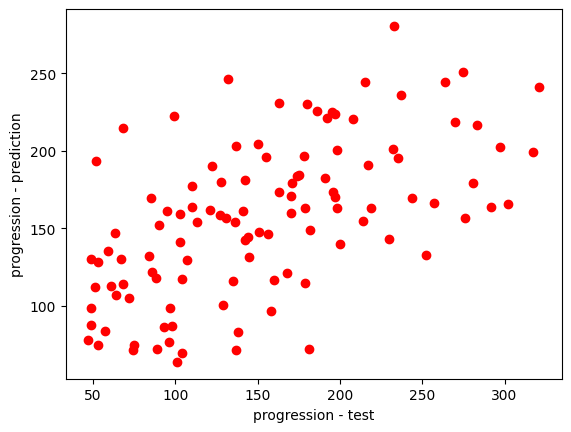

In [7]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred, color='r')
plt.xlabel('progression - test')
plt.ylabel('progression - prediction')

# get the R-square
print(f'R-square : {model.score(X_test, y_test)}')

In [8]:
# coef_ vs intercept_
intercept = model.intercept_
coef = model.coef_
print(intercept, coef)

X_test = pd.DataFrame([[1, 2, 3]], columns=['bmi', 's5', 'bp'])
# print(X_test)
pred = intercept + coef[0]*X_test.iloc[0, 0] + coef[1]*X_test.iloc[0, 1] + coef[2]*X_test.iloc[0, 2]

print(pred, model.predict(X_test))

153.0481474033419 [668.96987988 553.89754137 224.44743633]
2603.155419030544 [2603.15541903]


# **Training the model - Polinomial Regression with** `sklearn.preprocessing.PolynomialFeatures` and `sklearn.linear_model.LinearRegression`
with nth-degree:  
    `y = B0 + B1*x + B2*x^2 + ... + Bn*x^n`  
Note:  
- 1 biến độc lập X
- 1 biến phụ thuộc y

In [9]:

# data
X = pd.DataFrame([1.5, 2, 3, 4, 5, 6])
y = pd.DataFrame([1.5, 2.5, 4, 4, 4.5, 5])



[[  1.      1.5     2.25    3.375]
 [  1.      2.      4.      8.   ]
 [  1.      3.      9.     27.   ]
 [  1.      4.     16.     64.   ]
 [  1.      5.     25.    125.   ]
 [  1.      6.     36.    216.   ]]


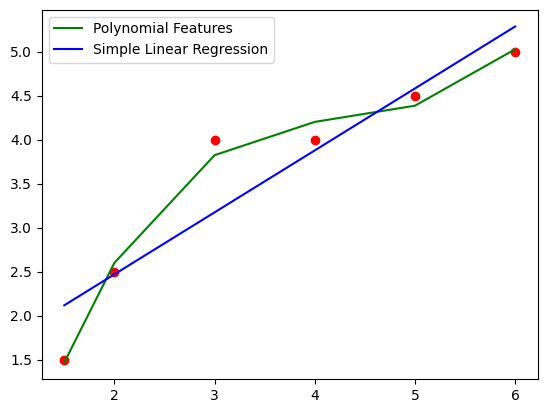

In [10]:
from sklearn.preprocessing import PolynomialFeatures
polyF = PolynomialFeatures(degree=3)
X_poly = polyF.fit_transform(X)
print(X_poly) # x^0, x^1 x^2

# PolynomialFeatures
model = LinearRegression()
model.fit(X_poly, y)

# simple Linear Regression
model2 = LinearRegression()
model2.fit(X, y)


plt.scatter(X, y, color='r')
plt.plot(X, model.predict(X_poly), c='g', label='Polynomial Features')
plt.plot(X, model2.predict(X), c='b', label='Simple Linear Regression')

plt.legend()

# **Training the model - Polinomial Multiple Regression with** `sklearn.preprocessing.PolynomialFeatures` and `sklearn.linear_model.LinearRegression`
With degree = 2:  
` y = B0 + B1x1 + B2x2 + B3x1^2 + B4x1x2 + B5x2^2 `


In [11]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['prog'] = data.target  # progress
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [12]:
X = df[['bmi', 's5', 'bp']]
y = df['prog']

# Polynomial X
poly_f = PolynomialFeatures(degree=2)
X_poly = poly_f.fit_transform(X)
# get_features_name
print(poly_f.get_feature_names_out())

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=0)
print(X_train)

['1' 'bmi' 's5' 'bp' 'bmi^2' 'bmi s5' 'bmi bp' 's5^2' 's5 bp' 'bp^2']
[[ 1.00000000e+00 -5.68631216e-02 -1.18968513e-02 ...  1.41535072e-04
   5.18010120e-04  1.89588687e-03]
 [ 1.00000000e+00 -5.57853095e-02  1.32375791e-01 ...  1.75233501e-02
  -4.85237773e-03  1.34366828e-03]
 [ 1.00000000e+00 -9.02752959e-02  2.40550854e-02 ...  5.78647132e-04
  -1.37867360e-03  3.28480140e-03]
 ...
 [ 1.00000000e+00 -2.12953232e-02  7.91224407e-02 ...  6.26036063e-03
   6.90632520e-03  7.61894252e-03]
 [ 1.00000000e+00 -7.30303027e-02 -1.81136923e-02 ...  3.28105849e-04
   1.03815343e-03  3.28480140e-03]
 [ 1.00000000e+00  7.13965152e-02  7.34069579e-02 ...  5.38858147e-03
   5.94668416e-04  6.56259031e-05]]


R-squared: 0.3222252352155066


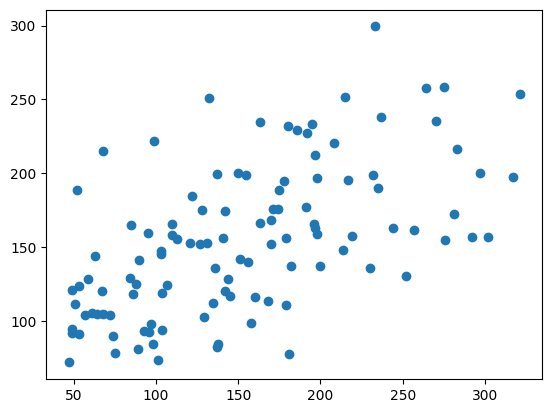

In [13]:
# training model
model = LinearRegression()
model.fit(X_train, y_train)

print(f'R-squared: {model.score(X_test, y_test)}')
plt.scatter(y_test, model.predict(X_test))

In [14]:
# coef & intercept
print(f'coef: {model.coef_}') # ['1' 'bmi' 's5' 'bp' 'bmi^2' 'bmi s5' 'bmi bp' 's5^2' 's5 bp' 'bp^2']
print(f'intercept: {model.intercept_}')

coef: [   0.          613.08517683  582.99147443  206.48363556  844.68195667
 2015.41500897 1495.64227726 -294.84090369 -512.80459722 1321.53668439]
intercept: 145.5395487840434


# ploting 3D Hyperplane
for model with 2 features, 1 target

In [15]:
data = load_diabetes()

df = pd.DataFrame(data.data, columns=data.feature_names)
X = df[['bmi', 'bp']]
y = pd.DataFrame(data.target, columns=['target'])
print(X.iloc[:5, :])
y.head()

        bmi        bp
0  0.061696  0.021872
1 -0.051474 -0.026328
2  0.044451 -0.005670
3 -0.011595 -0.036656
4 -0.036385  0.021872


,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [16]:
# Using PolinomialFeatures
polynomial_features = PolynomialFeatures(degree = 3)
X_poly = polynomial_features.fit_transform(X)
print(polynomial_features.get_feature_names_out())

# using LinearRegression
model = LinearRegression()
model.fit(X_poly, y)

print(f'score: {model.score(X_poly, y)}')

['1' 'bmi' 'bp' 'bmi^2' 'bmi bp' 'bp^2' 'bmi^3' 'bmi^2 bp' 'bmi bp^2'
 'bp^3']
score: 0.40731999878775016


[     0.            855.02500331    403.71892733     95.91870269
   4065.31315393   -249.72528385   -755.86869207 -26985.62686142
 -12621.06707476  10783.53755439]


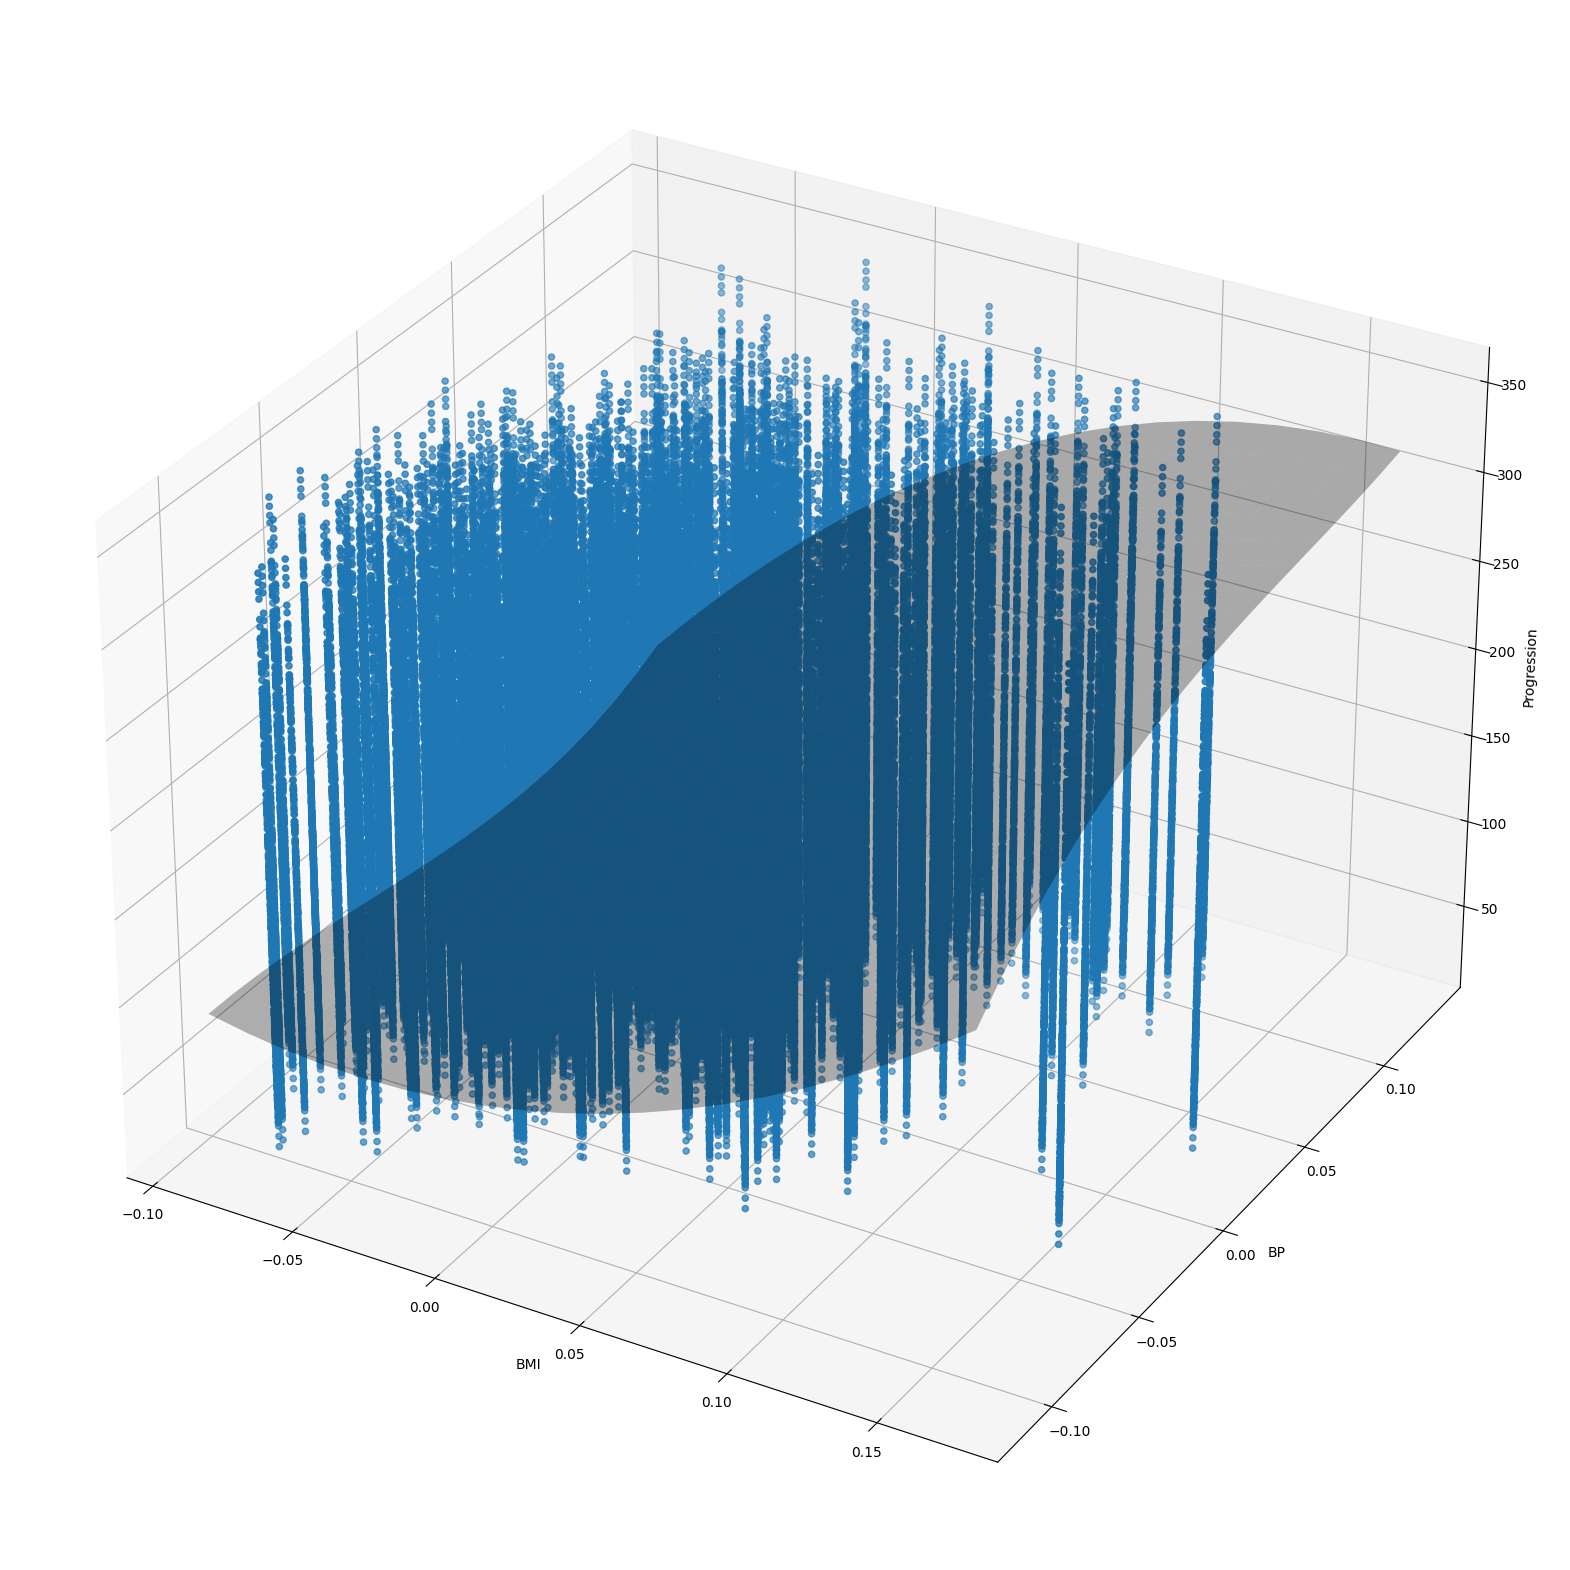

In [17]:
# plotting 3D hyperplain
import numpy as np
coef = model.coef_[0]
intercept = model.intercept_

print(coef)

z = lambda x, y: (intercept + coef[1]*x + coef[2]*y + coef[3]*x*x + coef[4]*x*y + coef[5]*y*y + coef[6]*x*x*x + coef[7]*x*x*y + coef[8]*x*y*y + coef[9]*y*y*y)

# create surface:
x_surf = np.linspace(X.bmi.min(), X.bmi.max(), 20)
y_surf = np.linspace(X.bp.min(), X.bp.max(), 20)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

fig = plt.figure(figsize=(20, 100))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.bmi, X.bp, y)
ax.set_xlabel('BMI')
ax.set_ylabel('BP')
ax.set_zlabel('Progression')
# print(X_test[:, 1])
ax.plot_surface(x_surf, y_surf, z(x_surf, y_surf), rstride=1,cstride=1,color='None', alpha=0.3)

plt.show()